In [21]:
isoforest_results_df.to_csv("../results/isoforest_predictions.csv", index=False)

In [20]:
import os

# Définir le chemin du dossier results (relatif au notebook)
results_dir = "../results"  # Remonte d'un niveau (vers anomaly-detection-project) puis entre dans results

# Vérifier si le dossier existe, sinon le créer
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

print(f"Le dossier '{results_dir}' a été créé.")

Le dossier '../results' a été créé.


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix (Isolation Forest):")
print(confusion_matrix(y_test, y_pred_labels_iso))

print("\nClassification Report (Isolation Forest):")
print(classification_report(y_test, y_pred_labels_iso))

Confusion Matrix (Isolation Forest):
[[  6   4]
 [  7 183]]

Classification Report (Isolation Forest):
              precision    recall  f1-score   support

     anomaly       0.46      0.60      0.52        10
      normal       0.98      0.96      0.97       190

    accuracy                           0.94       200
   macro avg       0.72      0.78      0.75       200
weighted avg       0.95      0.94      0.95       200



In [17]:
y_pred_labels_iso = ['anomaly' if pred == -1 else 'normal' for pred in y_pred_iso]

In [16]:
y_pred_iso = iso_forest.predict(X_test_scaled)

In [15]:
X_test_scaled = scaler.transform(X_test)

In [14]:
# Prédictions (-1 = anomalie, 1 = normal)
y_pred = iso_forest.predict(X_scaled)


In [13]:
from sklearn.ensemble import IsolationForest

# Création du modèle
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Entraînement sur les données (normalisées et encodées)
iso_forest.fit(X_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle SVM
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       1.00      0.40      0.57        10
      normal       0.97      1.00      0.98       190

    accuracy                           0.97       200
   macro avg       0.98      0.70      0.78       200
weighted avg       0.97      0.97      0.96       200



In [10]:
print(df.columns)

Index(['timestamp', 'ip', 'user', 'method', 'endpoint', 'status', 'log_type',
       'anomaly_type', 'hour', 'day_of_week', 'time_period', 'ip_type',
       'status_class'],
      dtype='object')


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # Désactive le centrage pour les matrices sparse
X_scaled = scaler.fit_transform(X_processed)

print("Dimensions de X_scaled :", X_scaled.shape)
print("Type de X_scaled :", type(X_scaled))

Dimensions de X_scaled : (1000, 30)
Type de X_scaled : <class 'scipy.sparse._csr.csr_matrix'>


In [8]:
print("Type de X_processed :", type(X_processed))
if hasattr(X_processed, 'head'):
    print("Premières lignes de X_processed :")
    print(X_processed.head())
else:
    print("Premières lignes de X_processed (sous forme de tableau NumPy) :")
    print(X_processed[:5])

Type de X_processed : <class 'scipy.sparse._csr.csr_matrix'>
Premières lignes de X_processed (sous forme de tableau NumPy) :
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35 stored elements and shape (5, 30)>
  Coords	Values
  (0, 0)	0.11435819218801835
  (0, 4)	1.0
  (0, 11)	1.0
  (0, 14)	1.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 23)	1.0
  (1, 0)	0.11435819218801835
  (1, 3)	1.0
  (1, 7)	1.0
  (1, 14)	1.0
  (1, 19)	1.0
  (1, 21)	1.0
  (1, 24)	1.0
  (2, 0)	-1.644998610704573
  (2, 3)	1.0
  (2, 7)	1.0
  (2, 17)	1.0
  (2, 19)	1.0
  (2, 20)	1.0
  (2, 25)	1.0
  (3, 0)	0.8474235267265982
  (3, 3)	1.0
  (3, 10)	1.0
  (3, 15)	1.0
  (3, 19)	1.0
  (3, 20)	1.0
  (3, 28)	1.0
  (4, 0)	-0.17886794162741357
  (4, 3)	1.0
  (4, 8)	1.0
  (4, 16)	1.0
  (4, 18)	1.0
  (4, 21)	1.0
  (4, 25)	1.0


In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sélection des colonnes
categorical_features = ["method", "endpoint", "time_period", "ip_type", "status_class", "day_of_week"]
numeric_features = ["hour"]

# Transformers
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
numeric_transformer = StandardScaler()

# Création du préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# On garde une copie propre du dataframe original
df_model = df.copy()

# On va retirer les colonnes inutiles pour l'entraînement
X = df_model.drop(columns=["timestamp", "ip", "user", "log_type", "anomaly_type"])
y = df_model["log_type"]  # Cible (normal vs anomaly)

# Application du pipeline de preprocessing
X_processed = preprocessor.fit_transform(X)

# Vérification de la forme des données encodées
print("Dimensions après encodage :", X_processed.shape)


Dimensions après encodage : (1000, 30)


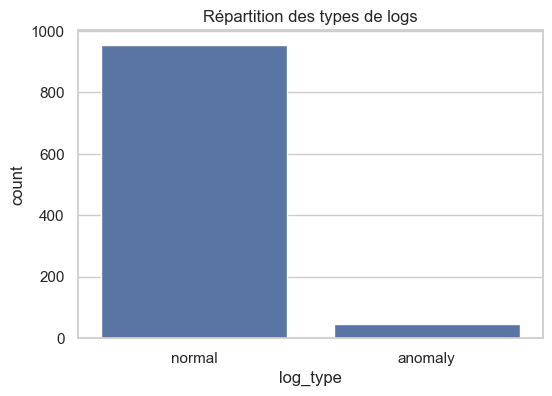

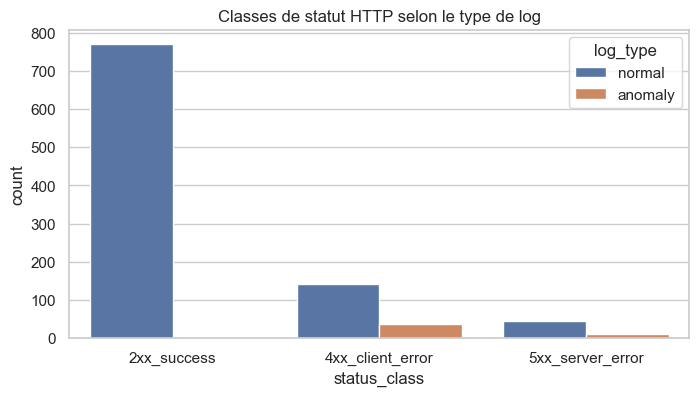

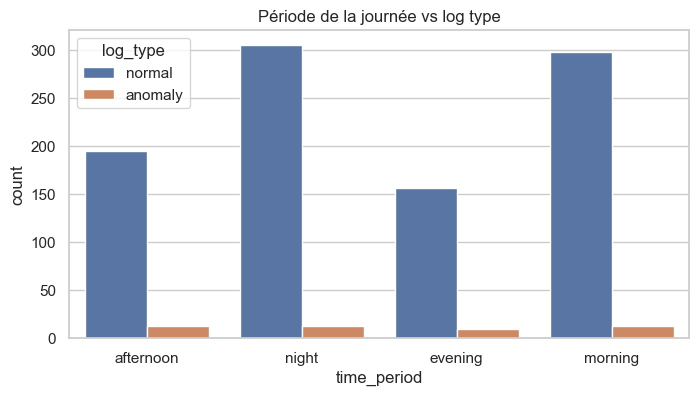

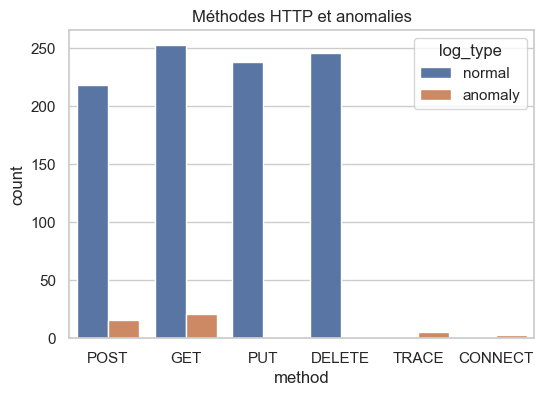

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution du type de logs
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="log_type")
plt.title("Répartition des types de logs")
plt.show()

# Distribution des classes de status HTTP
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="status_class", hue="log_type")
plt.title("Classes de statut HTTP selon le type de log")
plt.show()

# Répartition des requêtes par période de la journée
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="time_period", hue="log_type")
plt.title("Période de la journée vs log type")
plt.show()

# Méthode HTTP vs anomalies
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="method", hue="log_type")
plt.title("Méthodes HTTP et anomalies")
plt.show()


In [5]:
# Conversion de timestamp en datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Extraction de nouvelles features temporelles
df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.day_name()

# Création de tranches horaires
def get_time_period(hour):
    if 5 <= hour < 12:
        return "morning"
    elif 12 <= hour < 17:
        return "afternoon"
    elif 17 <= hour < 21:
        return "evening"
    else:
        return "night"

df["time_period"] = df["hour"].apply(get_time_period)

# Classification des IP (locale / publique)
def classify_ip(ip):
    if ip.startswith("192.") or ip.startswith("10.") or ip.startswith("172."):
        return "local"
    else:
        return "public"

df["ip_type"] = df["ip"].apply(classify_ip)

# Catégorisation des codes de statut HTTP
def classify_status(status):
    if 200 <= status < 300:
        return "2xx_success"
    elif 400 <= status < 500:
        return "4xx_client_error"
    elif 500 <= status < 600:
        return "5xx_server_error"
    else:
        return "other"

df["status_class"] = df["status"].apply(classify_status)

# Vérification du résultat
df.head()


,timestamp,ip,user,method,endpoint,status,log_type,anomaly_type,hour,day_of_week,time_period,ip_type,status_class
0,2025-03-28 12:57:09,20.51.40.36,olsonparker,POST,/products,200,normal,NaN,12,Friday,afternoon,public,2xx_success
1,2025-03-31 12:14:12,11.210.53.146,amanda52,GET,/admin,404,normal,NaN,12,Monday,afternoon,public,4xx_client_error
2,2025-04-05 00:14:05,103.231.88.32,randolphandrew,GET,/admin,200,normal,NaN,0,Saturday,night,public,2xx_success
3,2025-04-01 17:03:44,31.53.113.235,karenschmidt,GET,/login,200,normal,NaN,17,Tuesday,evening,public,2xx_success
4,2025-03-22 10:49:01,192.168.0.100,jacobmorris,GET,/api/data,429,anomaly,ip_flood,10,Saturday,morning,local,4xx_client_error


In [3]:
# Aperçu du nombre de valeurs uniques pour chaque colonne
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valeurs uniques")


timestamp: 1000 valeurs uniques
ip: 990 valeurs uniques
user: 998 valeurs uniques
method: 6 valeurs uniques
endpoint: 7 valeurs uniques
status: 6 valeurs uniques
log_type: 2 valeurs uniques
anomaly_type: 4 valeurs uniques


In [2]:
# Dimensions du dataset
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

# Aperçu des types de colonnes et valeurs manquantes
df.info()


Nombre de lignes : 1000
Nombre de colonnes : 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     1000 non-null   object
 1   ip            1000 non-null   object
 2   user          1000 non-null   object
 3   method        1000 non-null   object
 4   endpoint      1000 non-null   object
 5   status        1000 non-null   int64 
 6   log_type      1000 non-null   object
 7   anomaly_type  45 non-null     object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [1]:
# Étape 1 : Chargement et analyse initiale des logs

# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration de l'affichage des graphiques
%matplotlib inline
sns.set(style="whitegrid")

# Définition du chemin vers le fichier CSV des logs générés
log_file_path = os.path.join("..", "data", "generated_logs.csv")

# Chargement des données dans un DataFrame
df = pd.read_csv(log_file_path)

# Affichage des premières lignes du dataset
df.head()

,timestamp,ip,user,method,endpoint,status,log_type,anomaly_type
0,2025-03-28 12:57:09,20.51.40.36,olsonparker,POST,/products,200,normal,NaN
1,2025-03-31 12:14:12,11.210.53.146,amanda52,GET,/admin,404,normal,NaN
2,2025-04-05 00:14:05,103.231.88.32,randolphandrew,GET,/admin,200,normal,NaN
3,2025-04-01 17:03:44,31.53.113.235,karenschmidt,GET,/login,200,normal,NaN
4,2025-03-22 10:49:01,192.168.0.100,jacobmorris,GET,/api/data,429,anomaly,ip_flood
